<a href="https://colab.research.google.com/github/CaioLSouza/my_portfolio/blob/main/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction



No contexto empresarial, *churn* é uma métrica que indica a quantidade de clientes que cancelaram o serviço/assinatura de uma empresa, geralmente medido em algum intervalo temporal definido (semanal, mensal, anual etc.). Assim, se, por exemplo, uma empresa possui uma base de 100 clientes e 10 deles cancelam o serviço/produto oferecido por ela, então a taxa de churn é igual a 10%. Assim, churn é um problema enfrentado pelos mais variados tipos de empresas que buscam minimizar a sua ocorrência na medida do possível. 

Também é importante ressaltar que o problema do churn pode ser entendido tanto sob a ótica do número de clientes quanto sob a perspectiva do total de prejuízo monetário trazido pelos cancelamentos, que é o chamado MRR churn. O MRR churn é a soma do valor das assinaturas canceladas. Isso permite discriminar a perda de clientes maiores e mais importantes para o seu negócio daqueles clientes que são menos importantes. 

Portanto, para que uma empresa consiga um crescimento da sua quantidade de clientes, é necessário que o número de novos clientes seja superior ao número de churns. Além disso, o custo de conquistar novos clientes é, naturalmente, maior do que o custo de manter clientes que já assinam o seu serviço.


Logo, a possibilidade de conferir a uma empresa a capacidade de prever quais dos seus clientes estão prestes a cancelar a sua assinatura é de extrema importância e conveniência. A partir dessas informações, a empresa é capaz de tomar decisões que impeçam a perda desses clientes, como o envio de mensagens oficiais, o oferecimento de descontos, oportunidades especiais etc. 

Nesse contexto, podemos perceber o quanto o uso de machine learning pode ser útil. Com o uso dele, podemos construir modelos que sejam capazes de prever quais clientes estão mais propensos de cancelar a sua assinatura. Assim, uma empresa seria capaz de utilizar essas informações para reduzir o número de cancelamentos, permitindo um aumento em suas receitas e uma redução em seus custos. 

Dado isso, o propósito desse projeto é utilizar dados de uma empresa de telecomunicações para tentar prever se um determinado cliente irá ou não cancelar o seu serviço (churn).

## Definição do problema

Como se pode observar, estamos lidando com um típico problema de machine learning supervisionado para classificação: queremos, a partir de um conjunto de dados e informações conhecidas, prever se um determinado cliente irá ou não irá cancelar a sua assinatura. Portanto, a variável alvo ou variável resposta é uma variável binária que nos informa se houve ou não a ocorrência de *churn*.

## Importar pacotes que serão utilizados

In [85]:
# manipulação de dados
import pandas as pd
import numpy as np

# visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessamento
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder

# validação
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, GridSearchCV


# algorítmos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# divisão treino-teste
from sklearn.model_selection import train_test_split

# métricas de avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Aquisição dos Dados

O conjunto de dados que será utilizado foi disponibilizado pela plataforma de ensino da IBM Developer e pode ser encontrado [neste link](https://raw.githubusercontent.com/CaioLSouza/datasets/main/churn_dataset.csv) no formato ``csv``.

Ele não vem em conjunto com nenhuma descrição a respeito dele, mas os nomes das *features* são sugestivas o suficiente para uma clara compreensão do significado dos dados.

In [97]:
DATA_PATH = "https://raw.githubusercontent.com/CaioLSouza/datasets/main/churn_dataset.csv"
churn = pd.read_csv(DATA_PATH)
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [98]:
print(f"O número de linhas do conjunto de dados é: {churn.shape[0]}")
print(f"O número de variáveis do conjunto de dados é: {churn.shape[1]}")

O número de linhas do conjunto de dados é: 7043
O número de variáveis do conjunto de dados é: 21


In [99]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## Dicionário de Variáveis

``customerID``: Código de identificação do cliente.

``gender``: Gênero (masculino ou feminino).

``SeniorCitizen``: Aposentado ou não.

``Partner``: O cliente é um parceiro ou não.

``Dependents``: O cliente tem dependentes ou não.

``tenure``: Número de meses em que o cliente está com a empresa.

``PhoneService``: O cliente tem serviços de telefonia ou não.

``MultipleLines``: O cliente possui linhas múltiplas ou não.

``InternetServices``: Qual o tipo de serviço de internet do cliente.

``OnlineSecurity``: Se o cliente tem segurança online ou não.

``OnlineBackup``: Se o cliente possui backup online ou não 

``DeviceProtection``: Se o cliente possui um dispositivo de proteção ou não.

``TechSupport``: Se o cliente possui um auxílio tecnológico ou não.

``StreamingTV``: Se o cliente possui serviço de streaming de TV ou não.

``StreamingMovies``: Se o cliente possui serviço de streaming de filmes ou não.

``Contract``: Tempo de assinatura do contrato.

``PaperlessBilling``: Se a conta para o cliente pagar é online ou não.

``PaymentMethod``: Método de pagamento

``MonthlyCharges``: Pagamento mensal 

``TotalCharges``: Pagamento total (produto entre ``MonthlyCharges`` e ``Tenure``)

``Churn``: Houve ou não houve churn (variável-alvo).



Como se pode ver, a grande maioria das variáveis são do tipo categóricas. Apenas ``tenure``, ``MonthlyCharges`` e ``TotalCharges`` são variáveis numéricas.

## Funções utilizadas

In [68]:
def classification_features(dataset, target):
  ''' classifica as variáveis de um conjunto de dados em três categorias: 
  numéricas, categóricas binárias e categóricas não binárias '''
  bin_var = []
  cat_var = []
  num_var = []
  for col in dataset: 
    if dataset[col].nunique() == 2 and col != target:
      bin_var.append(col)
    if dataset[col].dtype == 'float64' or dataset[col].dtype == 'int64' and col not in bin_var and col != target:
      num_var.append(col)
    if dataset[col].dtype == 'object' and col not in bin_var and col != target:
      cat_var.append(col)
  return bin_var, cat_var, num_var

In [69]:
def metrics(y_test, preds):
  ''' essa função mostra os valores das métricas acurácia, recall, precisão e f1-score '''
  print('Acurácia: ', accuracy_score(y_test, preds))
  print('Recall: ', recall_score(y_test, preds))
  print('Precisão: ', precision_score(y_test, preds))
  print('F1-score: ', f1_score(y_test, preds))

In [72]:
def get_metrics(cross_validation):
  ''' obtêm itens de um dicionário e escreve todas as 
  suas chaves em conjunto com a média dos valores desse dicionário. '''
  for key, value in cross_validation.items():
    print(key, np.mean(value))

In [8]:
def plot_confusion_matrix(y_test, preds):
  ''' essa função cria um gráfico com uma matriz de confusão '''
  matrix = confusion_matrix(y_test, preds)
  fig, ax = plt.subplots(figsize=(8, 5))
  sns.heatmap(matrix, annot=True, cmap='viridis', fmt='d')
  ax.set_title('Matriz de confusão para o XGBoost')
  ax.set_xlabel('Previsto')
  ax.set_ylabel('Observado')
  plt.tight_layout()

In [80]:
def business_metrics(y_test, preds, dataset, monthly_charges):
  '''Essa função contém métricas de negócios relacionadas com o potencial retorno monetário gerado pelo modelo'''
  churn_rate = len(y_test[y_test == 1]) / len(y_test)

  predicted_churn_rate = len(preds[preds == 1]) / len(preds)

  recall = recall_score(y_test, preds)

  correct_positive_predictions = len(preds[(preds[preds == 1]) & (preds == y_test)]) / len(y_test)

  positive_correct = preds[(preds == 1) & (preds == y_test)]
  positive_correct = pd.Series(positive_correct, index=y_test.index)
  mrr = dataset.loc[positive_correct.index]
  anual_mrr = mrr[monthly_charges].mean() * 12

  summary = pd.Series([
      churn_rate, 
      predicted_churn_rate,
      recall,
      correct_positive_predictions,
      anual_mrr
  ],
  index = [
      'Taxa de churn', 
      'Taxa de churn prevista',
      'Recall' ,
      'Churns corretamente previstos', 
      'MRR churn anual por cliente (receita potencialmente salva)'
  ])
  
  return summary

## Análise exploratória dos dados

Vamos começar o projeto fazendo uma análise exploratória dos dados disponíveis.

### Valores ausentes

Primeiro, vamos verificar a quantidade de valores ausentes dentro das variáveis.

In [9]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Aparentemente, não há nenhum valor ausente dentro do conjunto de dados.

### Tipos de variáveis

In [10]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

O que mais chama a atenção aqui é a variável ``TotalCharges``, que é uma variável numérica, mas cujo tipo de dado está listado como categórica (object). Então é natural pensarmos em transformá-la em numérica. Contudo, ao fazermos isso, obtemos um erro, pois há informações dentro dessa variável que estão marcadas apenas com duas aspas (' ').

In [11]:
len(churn['TotalCharges'].loc[churn['TotalCharges'] == ' '])

11

O que aconteceu foi que os valores ausentes dessa variável foram marcados com duas aspas para indicá-los. Assim, vamos substituir esses valores por valores ausentes para então podermos transformar a variável para numérica novamente.

In [12]:
churn['TotalCharges'].replace(' ', 'NaN', inplace=True)

In [13]:
churn['TotalCharges'].isnull().sum()

0

In [14]:
churn['TotalCharges'] = churn['TotalCharges'].astype(float)

Além da divisão entre variáveis categóricas e numéricas, é importante também a subdivisão entre variáveis categóricas binárias e não binárias. Assim, para as variáveis abaixo, aquelas que possuem como valores únicos apenas dois valores distintos são as variáveis binárias.

In [15]:
churn.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

### Variável-alvo

A variável que estamos tentando prever nesse conjunto de dados é a variável ``Churn``.

In [16]:
churn['Churn'].unique()

array(['No', 'Yes'], dtype=object)

Trata-se, como já foi visto, de uma variável categórica binária. Será útil armazenar em variáveis diferentes os valores para cada classe distinta.

In [17]:
class_0 = churn.loc[churn['Churn'] == 'No']
class_1 = churn.loc[churn['Churn'] == 'Yes']

Vamos agora analisar o balanceamento dos dados.

In [18]:
print(f"Porcentagem de valores da classe positiva: {len(churn['Churn'].loc[churn['Churn'] == 'Yes']) / len(churn['Churn'])}")
print(f"Porcentagem de valores da classe negativa { 1 - len(churn['Churn'].loc[churn['Churn'] == 'Yes']) / len(churn['Churn'])}")

Porcentagem de valores da classe positiva: 0.2653698707936959
Porcentagem de valores da classe negativa 0.7346301292063041


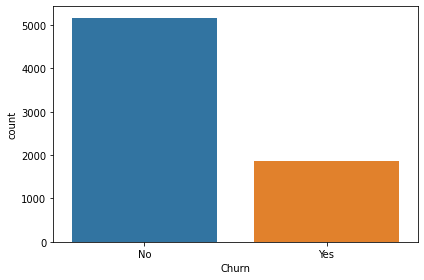

In [19]:
sns.countplot(x=churn['Churn'])
plt.tight_layout()

Como se poderia esperar intuitivamente, a maioria dos dados correspondem à classe negativa, ou seja, pessoas que não cancelaram o seu serviço. Esse desbalanceamento poderá ser tratado com mais profundidade na etapa da construção do modelo propriamente dito.

### Distribuições de frequência

Nessa etapa, podemos começar analisando a distribuição das duas variáveis numéricas contínuas do conjunto de dados: ``TotalCharges`` e ``MonthlyCharges``, respectivamente. Vamos também comparar os histogramas para os dados em que não há churn com os dados em que há ocorrência de churn.

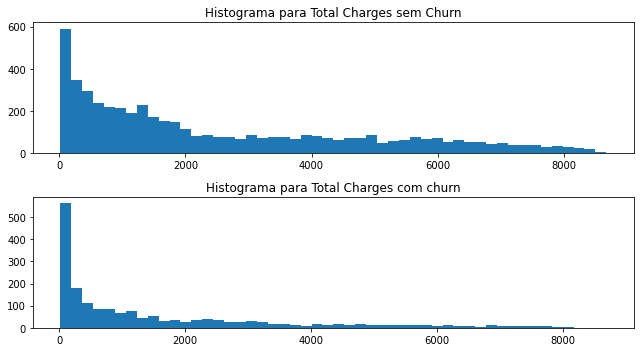

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9, 5))



ax[0].hist(class_0['TotalCharges'], bins=50)
ax[0].set_title('Histograma para Total Charges sem Churn')

ax[1].hist(class_1['TotalCharges'], bins=50)
ax[1].set_title('Histograma para Total Charges com churn')


plt.tight_layout()

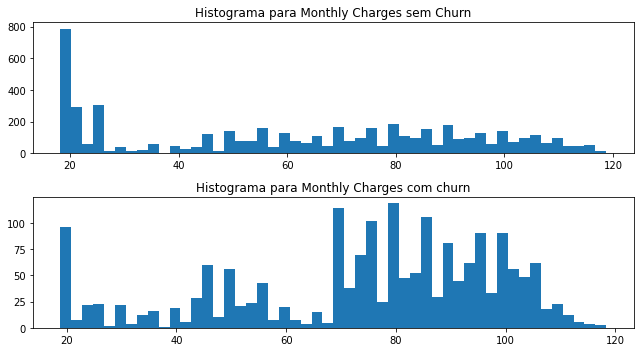

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(9, 5))

ax[0].hist(class_0['MonthlyCharges'], bins=50)
ax[0].set_title('Histograma para Monthly Charges sem Churn')

ax[1].hist(class_1['MonthlyCharges'], bins=50)
ax[1].set_title('Histograma para Monthly Charges com churn')



plt.tight_layout()

* Os histogramas para a variável ``TotalCharges`` mostram uma distribuição próxima a de Pareto. Para a ``MonthlyCharges`` temos uma distribuição de frequências bem menos ordenada, além de uma nítida diferença entre as observações com e sem churn. Ao que o gráfico indica, observações com churn são relativamente mais comuns quando há a presença de uma conta mensal mais alta.



* Agora, vamos analisar essas diferenças com um boxplot.

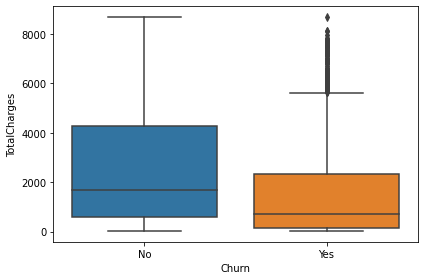

In [22]:
fig, ax = plt.subplots(figsize=(6, 4), sharex=True)
sns.boxplot(x= churn['Churn'], y=churn['TotalCharges'], ax=ax)
plt.tight_layout()

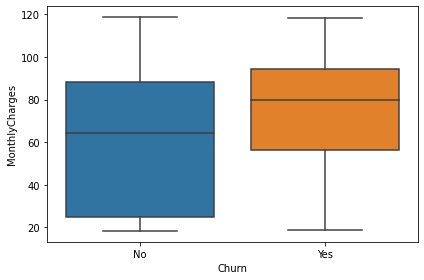

In [23]:
fig, ax = plt.subplots(figsize=(6, 4), sharex=True)
sns.boxplot(x=churn['Churn'], y=churn['MonthlyCharges'], ax=ax)
plt.tight_layout()

* ``TotalCharges`` 

  * A mediana das observações sem churn é maior do que as em que há churn
  * Há maior presença de outliers em observações com churn.

* ``MonthlyCharges``

  * A mediana das observações com churn tende a ser maior.


O que explica essa discrepância entre as medianas? Uma hipótese seria a de que pessoas com assinaturas mensais mais caras tendem a assinar por menos tempo, fazendo com que o pagamento total das pessoas que não tiveram churn seja, em média, maior.

### Qual a influência do gênero na ocorrência de *churn*? 

Uma pergunta razoável a se fazer é a de se homens ou mulheres possuem uma maior tendência de cancelar os serviços dessa empresa de telecomunicações. Para verificar isso, primeiro devemos analisar como os dois gêneros estão distribuídos no conjunto de dados. Após isso, podemos comparar isso com como os gêneros estão distribuídos para aquelas observações em que há ocorrência de *churn*.

A proporção de homens é: 0.504756495811444
A proporção de mulheres é: 0.495243504188556


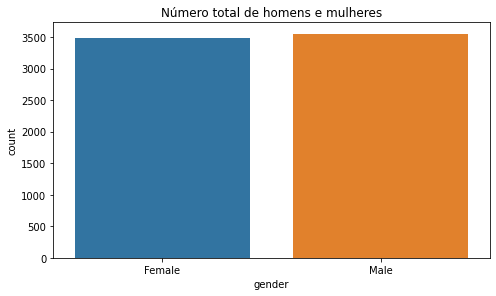

In [24]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.countplot(data=churn, x='gender')
plt.tight_layout()

ax.set_title('Número total de homens e mulheres')

print(f"A proporção de homens é: {len(churn['gender'].loc[churn['gender'] == 'Male']) / len(churn['gender'])}")
print(f"A proporção de mulheres é: {len(churn.loc[churn['gender'] == 'Female']) / len(churn)}")

A proporção de homens é: 0.49759229534510435
A proporção de mulheres é: 0.5024077046548957


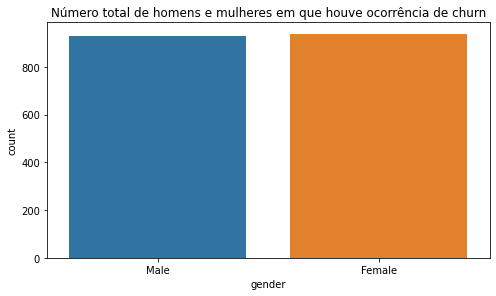

In [25]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.countplot(data=churn.loc[churn['Churn'] == 'Yes'], x='gender')

plt.tight_layout()

ax.set_title('Número total de homens e mulheres em que houve ocorrência de churn')

print(f"A proporção de homens é: {len(churn['gender'].loc[(churn['gender'] == 'Male') & (churn['Churn'] == 'Yes')]) / len(churn['gender'].loc[churn['Churn'] == 'Yes'])}")
print(f"A proporção de mulheres é: {len(churn.loc[(churn['gender'] == 'Female') & (churn['Churn'] == 'Yes')]) / len(churn.loc[churn['Churn'] == 'Yes'])}")

Os resultados nos mostram que, dentre as observações em que houve *churn*, não há uma predominância significativa maior de homens ou de mulheres.

### Clientes "sócios" possuem uma menor ocorrência de *churn*?

Vamos aplicar o mesmo procedimento para o gênero, mas agora iremos utilizar a variável ``Partner`` para comparar a taxa de *churn* entre sócios e não sócios da empresa.

A proporção de sócios é: 0.4830327985233565
A proporção de não sócios é: 0.5169672014766434


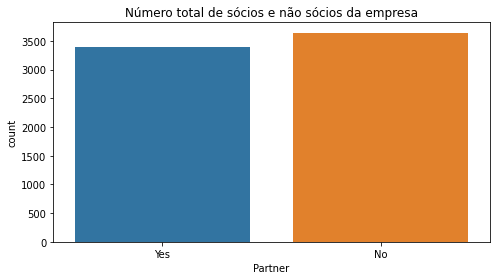

In [26]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.set_title('Número total de sócios e não sócios da empresa')
sns.countplot(data=churn, x='Partner')
plt.tight_layout()

print(f"A proporção de sócios é: {len(churn.loc[churn['Partner'] == 'Yes']) / len(churn['gender'])}")
print(f"A proporção de não sócios é: {len(churn.loc[churn['Partner'] == 'No']) / len(churn)}")

A proporção de sócios é: 0.3579454253611557
A proporção de não sócios é: 0.6420545746388443


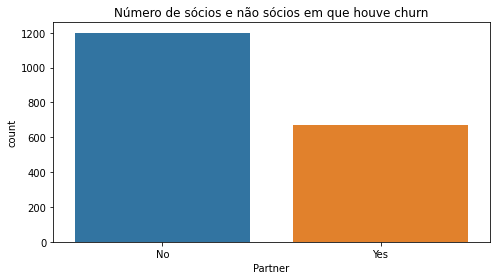

In [27]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.countplot(data=(churn.loc[churn['Churn'] == 'Yes']), x='Partner')
ax.set_title('Número de sócios e não sócios em que houve churn')
plt.tight_layout()

print(f"A proporção de sócios é: {len(churn.loc[(churn['Partner'] == 'Yes') & (churn['Churn'] == 'Yes')]) / len(churn.loc[churn['Churn'] == 'Yes'])}")
print(f"A proporção de não sócios é: {len(churn.loc[(churn['Partner'] == 'No') & (churn['Churn'] == 'Yes')]) / len(churn.loc[churn['Churn'] == 'Yes'])}")

Nessa caso vemos um cenário bem diferente. Os dados indicam que a taxa de *churn* de sócios é significativamente menor do que a de não sócios. Portanto, temos um indicativo que uma forma da empresa manter seus clientes e evitar churns está em aumentar a sua base de sócios.

### Clientes com contratos mais longos tendem a cancelar menos? 

Vamos aplicar, novamente, o mesmo procedimento, mas agora para a variável ``Contract``.

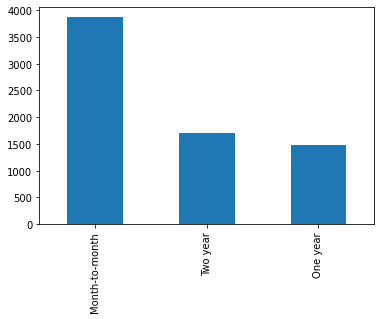

In [28]:
_ = churn['Contract'].value_counts().plot.bar()

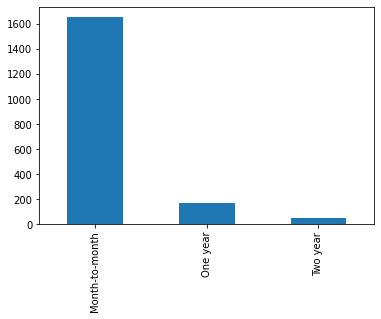

In [29]:
churn['Contract'].loc[churn['Churn'] == 'Yes'].value_counts().plot.bar()

Os gráficos mostram que há uma tendência de ocorrência maior de *churns* em usuários com contratos mensais, em contraposição aos contratos mais longos (um ano e dois anos).

## Pré-processamento dos dados

O próximo passo é realizar o pré-processamento dos dados para que eles possam ser utilizados pelos modelos de machine learning.

* Definir, claramente, os valores da variável alvo.

* Lidar com dados ausentes (como já visto, existem na variável ``TotalCharges``)

* Transformar as variáveis categóricas em numéricas. As binárias serão transformadas pelo método *label encoder*, enquanto nas não binárias será o utilizado o *one hot encoder*.

* Padronizar os dados.

* Remover variáveis desnecessárias.




### Definindo a variável-alvo

A variável-alvo é binária, ou seja, representa a ocorrência ou não de *churn*. Por isso, iremos definí-la da seguinte forma: 

* Se houve *churn*, então o valor dela é igual a 1.

* Caso contrário, é configurada como igual a 0.

In [30]:
churn['Churn'] = np.where(churn['Churn'] == 'Yes', 1, 0)

### Removendo variáveis

A coluna ``customerID`` não possui nenhuma informação relevante, apenas informa o código de identificação do cliente. Por isso, vamos removê-la.



In [31]:
churn = churn.drop('customerID', axis=1)

### Removendo valores ausentes

Temos, como já foi visto, 11 valores ausentes no conjunto de dados. Vamos remover essas entradas.

In [32]:
churn = churn.dropna(axis=0)

### Preparando as variáveis

As mudanças feitas nos dados precisam ser realizadas em função dos tipos de variáveis que temos nesse conjunto de dados. Assim, vamos utilizar uma função que separa as variáveis de acordo com essa classificação.

Há 3 tipos de variáveis no conjunto de dados:

* Numéricas.

* Categóricas binárias.

* Categóricas não binárias.

In [33]:
bin_var, cat_var, num_var = classification_features(churn, 'Churn')

### Categóricas não binárias

In [34]:
churn = pd.get_dummies(churn, columns = cat_var)

### Categóricas binárias



In [35]:
ordinal_encoder = OrdinalEncoder(dtype=int)
ordinal_encoder.fit(churn[bin_var])
churn[bin_var] = ordinal_encoder.transform(churn[bin_var])

### Divisão treino-teste

In [36]:
feature = churn.drop('Churn', axis=1)
target = churn['Churn']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

Para o pré-processamento, usaremos: 

* Variáveis numéricas: padronização dos dados.

* Variáveis categóricas binárias: encoder binário ("0 e 1").

* Variáveis categóricas não binárias: *One Hot Encoder*.



### Variáveis numéricas

In [38]:
scaler = StandardScaler()
scaler.fit(X_train[num_var])
X_train[num_var] = scaler.transform(X_train[num_var])
X_test[num_var] = scaler.transform(X_test[num_var])

## Selecionando um modelo simples 

Também vamos testar o desempenho de vários modelos simples e selecionar aquele com o melhor desempenho para ser aprimorado posteriormente. Para isso, iremos testar os seguintes algorítmos de classificação, mediante uma validação cruzada *5-fold*: 

* Regressão logística.

* Random Forest.

* Ada Boost. 

* Support Vector Machine.

* K-vizinhos mais próximos.

* XGBoost.

### Métricas utilizadas

Antes de construir os modelos, é necessário especificar quais serão os meios pelos quais iremos avaliar a sua performance. Nesse contexto, um modelo teria dois tipos de erros possíveis: 

* Prever a ocorrência de churn, mas o churn não ocorrer.

* Prever a não ocorrência de churn, mas o churn ocorrer.

O primeiro tipo seria um erro de **falso positivo**, enquanto o segundo seria o caso de um **falso negativo**.

Para esse problema especificamente, um erro de falso negativo seria muito mais danoso para a empresa, pois siginificaria a perda de um cliente. Dado esse fato, a principal métrica que utilizaremos será a *recall* (ou revocação, em português). Ela está relacionada com a quantidade de falsos negativos nas previsões feitas pelo modelo. 

In [39]:
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               AdaBoostClassifier(),
               SVC(),
               KNeighborsClassifier(),
               XGBClassifier()]

In [40]:
for classifier in classifiers:
  score = cross_val_score(classifier, X_train, y_train, cv=5, scoring='recall')
  print(classifier, score.mean())

LogisticRegression() 0.5591973244147157
RandomForestClassifier() 0.5070234113712374
AdaBoostClassifier() 0.5431438127090301
SVC() 0.5083612040133779
KNeighborsClassifier() 0.545819397993311
XGBClassifier() 0.5418060200668896


Como podemos ver, resultados muito parecidos foram obtidos pela regressão logística, AdaBoost, K-vizinhos mais próximos e XGBoost. Testaremos aqui dois modelos: uma regressão logística, por ter tido o melhor desempenho padrão e um XGBoost, por ser um modelo altamente flexível, com um grande potencial de aprimoramento.

### Lidando com desbalanceamento 

Como vimos anteriormente, existe um desbalanceamento dos dados entre as duas classes. Para lidar com isso, usaremos aqui o método *class weight*, que configura uma penalização maior no algorítmo para erros de classificação da classe minoritária, que é justamente a que estamos tentando prever aqui. 

## Regressão logística 

Vamos começar treinando uma regressão logística. Iremos otimizar o hiperparâmetro de regularização (``C``) com uma *grid search*.

In [41]:
cv = StratifiedKFold(shuffle=True)

In [42]:
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=300)

In [43]:
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100]
}

grid_search_log = GridSearchCV(log_reg, log_reg_params, cv = cv, scoring='recall')
grid_search_log.fit(X_train, y_train)

grid_search_log.best_params_, grid_search_log.best_score_

({'C': 1}, 0.8040133779264215)

In [44]:
log_reg = LogisticRegression(class_weight='balanced', random_state=42, C=10)

In [45]:
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)

### Resultados -- regressão logística

In [73]:
metrics(y_test, log_reg_preds)

Acurácia:  0.7299218194740583
Recall:  0.7914438502673797
Precisão:  0.49498327759197325
F1-score:  0.6090534979423867


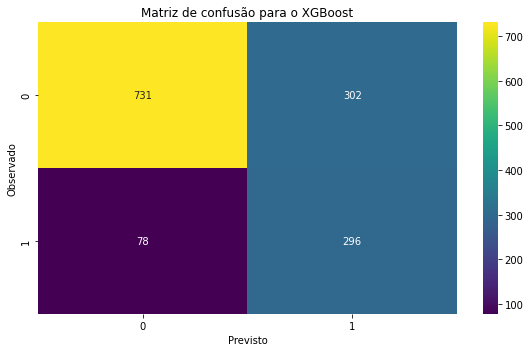

In [74]:
plot_confusion_matrix(y_test, log_reg_preds)

## XGBoost

XGBoost é um algorítmo de decisão que faz parte da família dos modelos de *gradient boosting*, que são sofisticações de árvores de decisões.

### Otimizando os hiperparâmetros

Uma abordagem típica na otimização de hiperparâmetros com XGBoost é a seguinte:

* Escolha uma *learning rate* padrão (como 0,1). A partir dela, escolha o melhor número de árvores para treinamento.

* Otimize os parâmetros da árvore.

* Otimize os parâmetros de regularização.

Portanto, ao invés de considerarmos todas as combinações de hiperparâmetros possíveis, dividimos o processo em etapas e otimizamos uma etapa por vez.



In [48]:
metrics = [
    'recall',
    'precision',
    'f1',
    'roc_auc'
]

#### Otimizando o número de árvores (``n_instances``)

In [49]:
xgb1 = XGBClassifier(
    learning_rate=0.1,
    seed=27,
    scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train== 1])
)

In [50]:
param_grid = {
    'n_estimators': [n for n in range(100, 1000, 50)]
}


grid_search = GridSearchCV(xgb1, param_grid, scoring='recall', n_jobs=-1, verbose=2, cv=cv)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(scale_pos_weight=2.762541806020067,
                                     seed=27),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600, 650, 700, 750,
                                          800, 850, 900, 950]},
             scoring='recall', verbose=2)

In [51]:
print(grid_search.best_params_, grid_search.best_score_)

{'n_estimators': 100} 0.7933110367892977


#### ``min_child_weight`` e ``max_depth``

In [52]:
xgb2 = XGBClassifier(
    learning_rate=0.1,
    scale_pos_weight= len(y_train[y_train == 0]) / len(y_train[y_train== 1]),
    seed=27,
    n_estimators=100
)

In [53]:
tree_param_grid = {
    'max_depth': [n for n in range(3, 10)],
    'min_child_weight': [n for n in range(3, 10)]
}


tree_grid_search = GridSearchCV(xgb2, tree_param_grid, scoring='recall', n_jobs=-1, verbose=2, cv=cv)

tree_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(scale_pos_weight=2.762541806020067,
                                     seed=27),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_child_weight': [3, 4, 5, 6, 7, 8, 9]},
             scoring='recall', verbose=2)

In [54]:
print(tree_grid_search.best_params_, tree_grid_search.best_score_)

{'max_depth': 3, 'min_child_weight': 3} 0.8006688963210703


#### ``gamma``

In [55]:
xgb3 = XGBClassifier(
    learning_rate=0.1,
    scale_pos_weight= len(y_train[y_train == 0]) / len(y_train[y_train== 1]),
    seed=27,
    n_estimators=100,
    max_depth = 3,
    min_child_weight = 4
)

In [56]:
gamma_params = {
    'gamma' : [n/10.0 for n in range(0, 10)]
}
grid_search_gamma = GridSearchCV(xgb3, gamma_params, cv = cv, scoring='recall')
grid_search_gamma.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(min_child_weight=4,
                                     scale_pos_weight=2.762541806020067,
                                     seed=27),
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9]},
             scoring='recall')

In [57]:
print(grid_search_gamma.best_params_, grid_search_gamma.best_score_)

{'gamma': 0.0} 0.8053511705685619


#### ``subsample`` e ``colsample_bytree``

In [58]:
sample_params = {
    'subsample': [n/10 for n in range(5, 10)],
    'colsample_bytrre': [n/10 for n in range(5, 10)]
}

grid_search_sample = GridSearchCV(xgb3, sample_params, cv = cv, scoring='recall')
grid_search_sample.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(min_child_weight=4,
                                     scale_pos_weight=2.762541806020067,
                                     seed=27),
             param_grid={'colsample_bytrre': [0.5, 0.6, 0.7, 0.8, 0.9],
                         'subsample': [0.5, 0.6, 0.7, 0.8, 0.9]},
             scoring='recall')

In [59]:
print(grid_search_sample.best_params_, grid_search_sample.best_score_)

{'colsample_bytrre': 0.5, 'subsample': 0.7} 0.7979933110367894


In [60]:
learning_params = {
    'learning_rate': [n/100 for n in range(1, 10, 2)]}


grid_search_learning = GridSearchCV(xgb3, learning_params, cv = cv, scoring='recall')
grid_search_learning.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBClassifier(min_child_weight=4,
                                     scale_pos_weight=2.762541806020067,
                                     seed=27),
             param_grid={'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09]},
             scoring='recall')

In [61]:
print(grid_search_learning.best_params_, grid_search_learning.best_score_)

{'learning_rate': 0.01} 0.8187290969899665


In [62]:
xgb4 = XGBClassifier(
    learning_rate=0.01,
    scale_pos_weight= len(y_train[y_train == 0]) / len(y_train[y_train== 1]),
    seed=27,
    n_estimators=100,
    gamma=0,
    colsample_bytree = 0.5,
    subsample=0.9 
)

### Resultados -- XGBoost


In [63]:
xgb4.fit(X_train, y_train)
xgb_preds = xgb4.predict(X_test)

In [70]:
metrics(y_test = y_test, preds=  xgb_preds)

Acurácia:  0.7185501066098081
Recall:  0.8155080213903744
Precisão:  0.4825949367088608
F1-score:  0.606361829025845


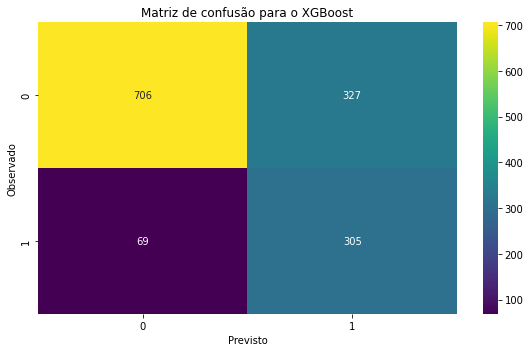

In [71]:
plot_confusion_matrix(y_test, xgb_preds)

## Resultados -- métricas de negócios

Com os resultados obtidos, podemos calcular algumas métricas de negócios.

* Churn rate: como explicado no início, é a proporção de clientes que efetuaram churn no conjunto de dados.

* Taxa de churn rate prevista: é a taxa de churn prevista pelo modelo.

* É a taxa de churn corretamente prevista pelo modelo, em relação ao conjunto total de dados.

* MMR churn anual por cliente: é a quantidade de receitas anuais média que cada cliente que realizou churn e foi corretamente previsto pelo modelo gera. Se nós supormos que, ao identificar esses clientes, nós conseguíssemos impedir 100% dos churns de se concretizarem, então esse valor seria igual à receita salva pela empresa por ano e por cliente.

In [100]:
xgb_preds = pd.Series(xgb_preds, index=y_test.index)
log_reg_preds = pd.Series(log_reg_preds, index=y_test.index)

In [109]:
print("Métricas de negócios -- regressão logística\n")
business_metrics(y_test, xgb_preds, churn, 'MonthlyCharges')

Métricas de negócios -- regressão logística



Taxa de churn                                                   0.265814
Taxa de churn prevista                                          0.449183
Recall                                                          0.815508
Churns corretamente previstos                                   0.216773
MRR churn anual por cliente (receita potencialmente salva)    782.413220
dtype: float64

In [110]:
print('Métricas de negócios\n')
business_metrics(y_test, log_reg_preds, churn, 'MonthlyCharges')

Métricas de negócios



Taxa de churn                                                   0.265814
Taxa de churn prevista                                          0.425018
Recall                                                          0.791444
Churns corretamente previstos                                   0.210377
MRR churn anual por cliente (receita potencialmente salva)    782.413220
dtype: float64

## Conclusões

Como se pode observar, obtemos resultados extremamente parecidos entre os dois algorítmos e até idênticos no caso do MMR anual. O maior ponto fraco dos modelos está na ocorrência de falsos positivos.

Contudo, a detecção de churn está na casa dos 80%, o que reflete em um potencial de ganhos muito grandes para a empresa. Logo, após a implementação desse modelo, o próximo passo seria a criação de estratégias que sejam capazes de manter a maior parte possível dos clientes identificados pelo algorítmo de machine learning.

Dentre elas, podemos citar o oferecimento de incentivos, brindes, descontos, oferecer melhores serviços, melhorar a qualidade dos contratos, dentre outras alternativas.

